# euclidean algorithm

comparing the algorithmic efficiency of Euclid's original version, and the one using the modulo operator

the number of steps are shown in log scale for *gcd(x, y)*

the division based algorithm always needs less than *O(h)* divisions, where *h* is the number of digits in the smaller number *b*<br>
in the uniform cost model the total running time is also *O(h)*, however the computational expense of a modulo operator can be as large as *O($h^{2}$)*, so using a telescoping series, it can be shown that the total time is *O($h^{2}$)*

for very large integers there are alternative, quasilinear methods that generally scale as *O(h log $h^{2}$ log log h)*

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [2]:
def subtraction_based_euclidean(a, b):
    steps = 1
    while a != b:
        steps += 1
        if a > b:
            a -= b
        else:
            b -= a
    return a, steps

In [3]:
def division_based_euclidean(a, b):
    steps = 0
    if a < b:
        a, b = b, a
    while b != 0:
        steps += 1
        a, b = b, a % b
    return a, steps

___


In [4]:
def plot(N):
    gcd_matrix = np.array([[0] * N for _ in range(N)])
    subtraction_steps_matrix = np.array([[0] * N for _ in range(N)])
    division_steps_matrix = [[0] * N for _ in range(N)]

    for i in range(1, N + 1):
        for j in range(i, N + 1):
            sub_gcd, sub_steps = subtraction_based_euclidean(i, j)
            div_gcd, div_steps = division_based_euclidean(i, j)

            gcd_matrix[i - 1][j - 1] = gcd_matrix[j - 1][i - 1] = sub_gcd
            subtraction_steps_matrix[i - 1][j - 1] = subtraction_steps_matrix[j - 1][i - 1] = sub_steps
            division_steps_matrix[i - 1][j - 1] = division_steps_matrix[j - 1][i - 1] = div_steps

    average_sub_steps = np.mean(subtraction_steps_matrix)
    average_div_steps = np.mean(division_steps_matrix)
    div_over_sub_matrix = division_steps_matrix / subtraction_steps_matrix
    average_div_over_sub = np.mean(div_over_sub_matrix)

    plt.imshow(subtraction_steps_matrix, norm=colors.LogNorm(vmin=1, vmax=N), cmap='coolwarm')
    plt.colorbar()
    plt.title("subtraction")
    plt.text(1, 1, f"avg: {average_sub_steps:.2f}", color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
    plt.gca().invert_yaxis()
    plt.show()

    plt.imshow(division_steps_matrix, norm=colors.LogNorm(vmin=1, vmax=N), cmap='coolwarm')
    plt.colorbar()
    plt.title("division")
    plt.text(1, 1, f"avg: {average_div_steps:.2f}", color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
    plt.gca().invert_yaxis()
    plt.show()


    plt.imshow(div_over_sub_matrix, cmap='plasma')
    plt.colorbar()
    plt.title("increase (division / subtraction)")
    plt.text(1, 1, f"avg: {average_div_over_sub:.2f}", color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
    plt.gca().invert_yaxis()
    plt.show()
    return division_steps_matrix

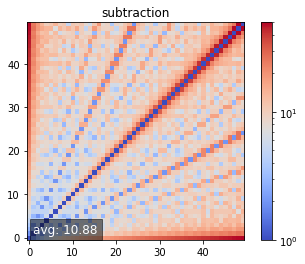

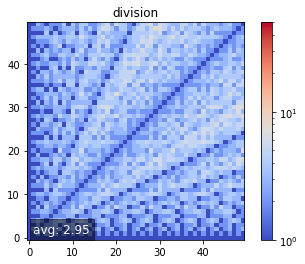

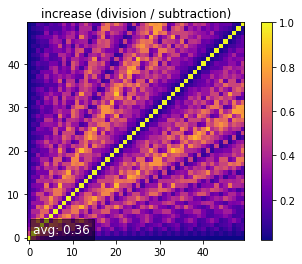

In [5]:
plot(50);

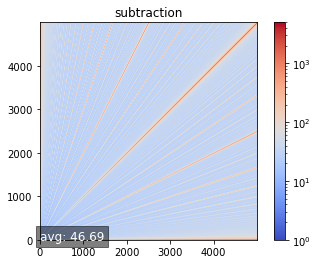

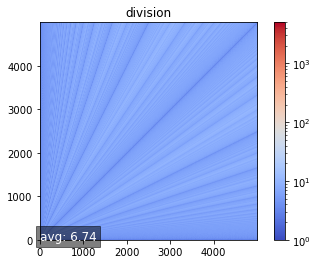

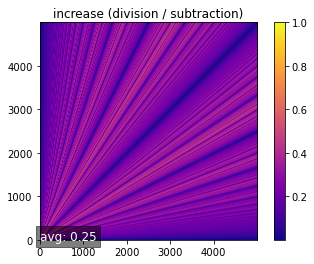

In [6]:
division_steps_matrix = plot(5000);

### worst-case

if *gcd(a, b)* for *a > b > 0* requires *N* steps, the smallest values of *a* and *b* for which this is true are the Fibonacci numbers *$F_{N+2}$* and *$F_{N+1}$*<br>
so *(N − 1)/5 < $log_{10}Φ$ $log_{Φ}b$*

the area with the largest step count follows the line *y = Φx*, where *Φ* is the golden ratio

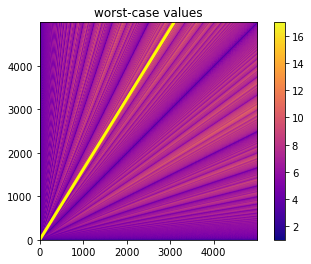

In [7]:
def golden_ratio(x):
    return x*((1+np.sqrt(5))/2)

x = np.linspace(1, 3089) # 5000/Φ

plt.imshow(division_steps_matrix, cmap='plasma')
plt.colorbar()
plt.title("worst-case values")
plt.gca().invert_yaxis()
plt.plot(x, golden_ratio(x), linewidth='3', color='yellow')
plt.show()